In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import statsmodels.api as sm
from fancyimpute import IterativeImputer

In [2]:
# Carregar o DataFrame original
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime
df['Screening_date'] = pd.to_datetime(df['Screening_date'])

# Criar um DataFrame com o total de rastreios por data
total_screenings_df = df.groupby('Screening_date').size().reset_index(name='Total_screenings')

total_screenings_df

,Screening_date,Total_screenings
0,2022-03-03,92
1,2022-03-19,62
2,2022-03-26,90
3,2022-04-04,69
4,2022-04-09,70
...,...,...
85,2024-03-23,168
86,2024-03-30,198
87,2024-04-06,242
88,2024-04-20,186


In [3]:
# Criar um intervalo de datas completo
min_date = df['Screening_date'].min()
max_date = df['Screening_date'].max()
date_range = pd.date_range(start=min_date, end=max_date)

# Criar um DataFrame com todas as datas do intervalo
all_dates_df = pd.DataFrame(date_range, columns=['Screening_date'])

# Fazer o merge de total_screenings_df com all_dates_df
complete_screenings_df = all_dates_df.merge(total_screenings_df, on='Screening_date', how='left')

# Substituir os valores ausentes por 0
complete_screenings_df['Total_screenings'] = complete_screenings_df['Total_screenings'].fillna(0).astype(int)

print(complete_screenings_df)

    Screening_date  Total_screenings
0       2022-03-03                92
1       2022-03-04                 0
2       2022-03-05                 0
3       2022-03-06                 0
4       2022-03-07                 0
..             ...               ...
782     2024-04-23                 0
783     2024-04-24                 0
784     2024-04-25                 0
785     2024-04-26                 0
786     2024-04-27               184

[787 rows x 2 columns]


In [4]:
import pandas as pd

# Carregar o DataFrame
df = pd.read_excel('C:/Users/Patyc/OneDrive/Desktop/Dissertation/Data/Skin_clean and treated/Skin_clean.xlsx')

# Converter a data para datetime e ordenar de forma crescente
df['Screening_date'] = pd.to_datetime(df['Screening_date'])
df = df.sort_values(by='Screening_date')

# Imputação de valores ausentes
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column] = df[column].fillna(df[column].median())
    else:
        df[column] = df[column].fillna(df[column].mode().iloc[0])

# Agrupar dados por 'Screening_date' para remover duplicatas
aggregations = {col: (lambda x: x.mode()[0] if x.dtype == 'O' else x.median()) for col in df.columns if col != 'Screening_date'}
df = df.groupby('Screening_date').agg(aggregations).reset_index()

# Criar um intervalo de datas completo
min_date = df['Screening_date'].min()
max_date = df['Screening_date'].max()
date_range = pd.date_range(start=min_date, end=max_date)

# Reindexar o DataFrame para incluir todas as datas
df = df.set_index('Screening_date').reindex(date_range).reset_index().rename(columns={'index': 'Screening_date'})

# Preencher valores ausentes após a reindexação
for column in df.columns:
    if pd.api.types.is_numeric_dtype(df[column]):
        df[column] = df[column].fillna(df[column].median())
    else:
        df[column] = df[column].fillna(df[column].mode().iloc[0])

# Agrupar os dados por dias, usando mediana para numéricas e moda para categóricas
aggregations = {col: (lambda x: x.mode()[0] if x.dtype == 'O' else x.median()) for col in df.columns if col != 'Screening_date'}

df_grouped = df.groupby('Screening_date').agg(aggregations).reset_index()

df_grouped


,Screening_date,Gender,Age,Personal_cancer_history,Family_cancer_history,Sun_exposure,Body_signs,Premalignant,Malignant,Phototype_2,Phototype_3,Phototype_4,Phototype_5,Phototype_6
0,2022-03-03,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2022-03-04,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2022-03-05,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2022-03-06,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2022-03-07,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,2024-04-23,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
783,2024-04-24,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
784,2024-04-25,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
785,2024-04-26,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df_grouped.columns

Index(['Screening_date', 'Gender', 'Age', 'Personal_cancer_history',
       'Family_cancer_history', 'Sun_exposure', 'Body_signs', 'Premalignant',
       'Malignant', 'Phototype_2', 'Phototype_3', 'Phototype_4', 'Phototype_5',
       'Phototype_6'],
      dtype='object')

In [6]:
# Supondo que complete_screenings_df e df_grouped já estejam carregados

# Fazer o merge dos dois DataFrames na coluna 'Screening_date'
df = pd.merge(df_grouped, complete_screenings_df[['Screening_date', 'Total_screenings']], on='Screening_date', how='left')

# Verificar o resultado
df


,Screening_date,Gender,Age,Personal_cancer_history,Family_cancer_history,Sun_exposure,Body_signs,Premalignant,Malignant,Phototype_2,Phototype_3,Phototype_4,Phototype_5,Phototype_6,Total_screenings
0,2022-03-03,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,92
1,2022-03-04,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,2022-03-05,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,2022-03-06,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,2022-03-07,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
782,2024-04-23,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
783,2024-04-24,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
784,2024-04-25,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
785,2024-04-26,1.0,59.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [7]:
from statsmodels.tsa.stattools import adfuller

# Você pode fazer isso ordenando o DataFrame pela data, se ainda não estiver ordenado:
df = df.sort_values(by='Screening_date')

# Agora vamos realizar o teste ADF
result = adfuller(df['Total_screenings'].dropna())

# Extrair os resultados
adf_statistic = result[0]
p_value = result[1]
used_lag = result[2]
n_obs = result[3]
critical_values = result[4]
is_stationary = p_value < 0.05  # Verifica se a série é estacionária a um nível de significância de 5%

# Exibir os resultados
print(f'ADF Statistic: {adf_statistic}')
print(f'p-value: {p_value}')
print(f'Used lag: {used_lag}')
print(f'Number of observations: {n_obs}')
print('Critical Values:')
for key, value in critical_values.items():
    print(f'   {key}: {value}')

if is_stationary:
    print("A série temporal é estacionária.")
else:
    print("A série temporal NÃO é estacionária.")


ADF Statistic: -2.996532692807403
p-value: 0.03521947433465731
Used lag: 20
Number of observations: 766
Critical Values:
   1%: -3.438915730045254
   5%: -2.8653205426302253
   10%: -2.5687831424305845
A série temporal é estacionária.


In [8]:
df.columns


Index(['Screening_date', 'Gender', 'Age', 'Personal_cancer_history',
       'Family_cancer_history', 'Sun_exposure', 'Body_signs', 'Premalignant',
       'Malignant', 'Phototype_2', 'Phototype_3', 'Phototype_4', 'Phototype_5',
       'Phototype_6', 'Total_screenings'],
      dtype='object')

# NORMALIZAÇÃO - X e y


GLM (Kernel), SVR (Gaussian Kernel), SVR (Linear Kernel), MLP NN, LSTM, e CNN

In [11]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Supondo que você já tenha um DataFrame chamado 'df'
# Criando o scaler
scaler = MinMaxScaler()

df['Age'] = scaler.fit_transform(df[['Age']])

# Definir as features (X) e a variável target (y)
X = df.drop(columns=['Screening_date', 'Total_screenings'])
y = df['Total_screenings']

# SEM NORMALIZAÇÃO - X e y

MLR, GLM GAUSSIAN, XGB

In [12]:
# Definir as features (X) e a variável target (y)
X = df.drop(columns=['Screening_date', 'Total_screenings'])
y = df['Total_screenings']

DIVISÃO EM TRAIN E TEST

shuffle

In [13]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

split date

In [84]:
# Definindo as datas de corte
split_date = '2024-03-01'

# Dividindo os dados com base na data
train = df[df['Screening_date'] < split_date]
test = df[df['Screening_date'] >= split_date]

# Separando X e y para cada conjunto
X_train = train.drop(columns=['Total_screenings', 'Screening_date'])
y_train = train['Total_screenings']

X_test = test.drop(columns=['Total_screenings', 'Screening_date'])
y_test = test['Total_screenings']

# MLR MODEL

In [22]:
from sklearn.linear_model import LinearRegression

# Adicionar uma constante aos dados
X_train_sm = sm.add_constant(X_train)
X_test_sm = X_test.copy()  # Certifique-se de que não está sobrescrevendo X_test original
X_test_sm.insert(0, 'const', 1.0)

# print(X_train_sm.head())
# print(X_test_sm.head())

# Ajustar o modelo
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Obter o resumo do modelo
print(model_sm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_sm.predict(X_test_sm)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))


                            OLS Regression Results                            
Dep. Variable:       Total_screenings   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.521
Method:                 Least Squares   F-statistic:                     80.22
Date:                Fri, 23 Aug 2024   Prob (F-statistic):          6.19e-110
Time:                        17:06:07   Log-Likelihood:                -3272.6
No. Observations:                 729   AIC:                             6567.
Df Residuals:                     718   BIC:                             6618.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1967: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


In [23]:
print("Modelo: MLR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# shuffle
# MAE: 16.100162531427557
# MSE: 2079.279779906138
# RMSE: 45.59912038522386
# R2: 0.4511089708478411
# ME: 8.35584499995114
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf

# Modelo: MLR split
# MAE: 19.552510098133403
# MSE: 2883.713193007047
# RMSE: 53.70021594935207
# R2: 0.5313038143231381
# ME: 12.537211945456859
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: MLR
MAE: 19.552510098133403
MSE: 2883.713193007047
RMSE: 53.70021594935207
R2: 0.5313038143231381
ME: 12.537211945456859
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


# GLM MODEL

In [32]:
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod.families import Gaussian
from sklearn.preprocessing import PolynomialFeatures

GAUSSIAN

In [25]:
# Ajustar o modelo GLM com família Gaussian
model_glm = GLM(y_train, X_train_sm, family=Gaussian()).fit()

# Obter o resumo do modelo
print(model_glm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_glm.predict(X_test_sm)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))


                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_screenings   No. Observations:                  729
Model:                            GLM   Df Residuals:                      718
Model Family:                Gaussian   Df Model:                           10
Link Function:               Identity   Scale:                          471.43
Method:                          IRLS   Log-Likelihood:                -3272.6
Date:                Fri, 23 Aug 2024   Deviance:                   3.3848e+05
Time:                        17:06:55   Pearson chi2:                 3.38e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.6673
Covariance Type:            nonrobust                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [26]:
print("Modelo: GLM com Gaussian")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# SPLIT
# Modelo: GLM com Gaussian
# Modelo: GLM com Gaussian
# MAE: 19.552510098133403
# MSE: 2883.713193007047
# RMSE: 53.70021594935207
# R2: 0.5313038143231381
# ME: 12.537211945456859
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

# shuffle
# MAE: 16.100162531426243
# MSE: 2079.2797799061614
# RMSE: 45.59912038522411
# R2: 0.45110897084783497
# ME: 8.355844999952732
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf


Modelo: GLM com Gaussian
MAE: 19.552510098133403
MSE: 2883.713193007047
RMSE: 53.70021594935207
R2: 0.5313038143231381
ME: 12.537211945456859
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


Kernel

In [70]:
# Definir o grau do polinômio
degree = 2

# Criar o transformador polinomial
poly = PolynomialFeatures(degree)

# Ajustar e transformar os dados de treino
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Adicionar uma constante aos dados transformados
X_train_poly_sm = sm.add_constant(X_train_poly)
X_test_poly_sm = sm.add_constant(X_test_poly)

# Ajustar o modelo GLM com família Gaussian
model_glm = GLM(y_train, X_train_poly_sm, family=Gaussian()).fit()

# Obter o resumo do modelo
print(model_glm.summary())

# Fazer previsões no conjunto de teste
y_pred = model_glm.predict(X_test_poly_sm)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

                 Generalized Linear Model Regression Results                  
Dep. Variable:       Total_screenings   No. Observations:                  729
Model:                            GLM   Df Residuals:                      707
Model Family:                Gaussian   Df Model:                           21
Link Function:               Identity   Scale:                          324.08
Method:                          IRLS   Log-Likelihood:                -3129.7
Date:                Fri, 23 Aug 2024   Deviance:                   2.2869e+05
Time:                        17:12:20   Pearson chi2:                 2.29e+05
No. Iterations:                     3   Pseudo R-squ. (CS):             0.8733
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        127.8189     57.678      2.216      0.0

In [71]:
print("Modelo: GLM com kernel polinomial")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

#SPLIT
# MAE: 19.4595641738632
# MSE: 3285.3859501051134
# RMSE: 57.3182863500394
# R2: 0.4660190663118915
# ME: 14.40419655531106
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

# Modelo: GLM com kernel polinomial shuffle
# MAE: 15.176219043967704
# MSE: 2220.7598437359093
# RMSE: 47.12493866028803
# R2: 0.41376087628620317
# ME: 5.568448676619094
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: GLM com kernel polinomial
MAE: 19.4595641738632
MSE: 3285.3859501051134
RMSE: 57.3182863500394
R2: 0.4660190663118915
ME: 14.40419655531106
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


# SVR MODEL

In [72]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

Kernel gaussiano

In [73]:
# Definir o modelo SVR com kernel RBF
model_svr = SVR(kernel='rbf', C=1.0, gamma='scale')

# Ajustar o modelo
model_svr.fit(X_train, y_train)

# "Summary" of the model
print(f"Support Vectors: {model_svr.support_vectors_}")
print(f"Number of Support Vectors: {model_svr.n_support_}")
print(f"Dual Coefficients: {model_svr.dual_coef_}")

# Fazer previsões no conjunto de teste
y_pred = model_svr.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

Support Vectors: [[1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.68055556 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.56944444 0.         ... 0.         0.         0.        ]]
Number of Support Vectors: [160]
Dual Coefficients: [[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.          0.83281469  1.         -1.
   1.          1.          1.          1.          1.         -1.
   1.          1.        

In [74]:
print("Modelo: SVR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# SPLIT
# MAE: 25.145532196122737
# MSE: 5888.009708540903
# RMSE: 76.73336763456237
# R2: 0.04300895861847631
# ME: 24.969670123723738
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

#SHUFFLE
# MAE: 17.183307011815156
# MSE: 3607.254946723876
# RMSE: 60.06042746038256
# R2: 0.047752063355868235
# ME: 17.00355970237298
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: SVR
MAE: 25.145532196122737
MSE: 5888.009708540903
RMSE: 76.73336763456237
R2: 0.04300895861847631
ME: 24.969670123723738
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


Linear kernel

In [75]:
# Definir o modelo SVR com kernel RBF
model_svr_linear = SVR(kernel='linear', C=1.0)

# Ajustar o modelo
model_svr_linear.fit(X_train, y_train)

# "Summary" of the model
print(f"Support Vectors: {model_svr_linear.support_vectors_}")
print(f"Number of Support Vectors: {model_svr_linear.n_support_}")
print(f"Dual Coefficients: {model_svr_linear.dual_coef_}")

# Fazer previsões no conjunto de teste
y_pred = model_svr_linear.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

Support Vectors: [[1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.68055556 0.         ... 0.         0.         0.        ]
 ...
 [1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.56944444 0.         ... 0.         0.         0.        ]
 [1.         0.56944444 0.         ... 0.         0.         0.        ]]
Number of Support Vectors: [166]
Dual Coefficients: [[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.
   1.  1. -1. -1.  1. -1. -1. -1. -1. -1. -1.  1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.
  -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.  

In [76]:
print("Modelo: SVR")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# SPLIT
# Modelo: SVR
# Modelo: SVR
# MAE: 23.90365856896573
# MSE: 5360.973302776779
# RMSE: 73.21866772058051
# R2: 0.12866933347597154
# ME: 23.727802442499463
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

# SHUFFLE
# Modelo: SVR
# MAE: 16.609956776780002
# MSE: 3394.09916155247
# RMSE: 58.258897702861404
# R2: 0.10402120973199991
# ME: 16.430209941342984
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: SVR
MAE: 23.90365856896573
MSE: 5360.973302776779
RMSE: 73.21866772058051
R2: 0.12866933347597154
ME: 23.727802442499463
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


# MLP NN MODEL

In [77]:
from sklearn.neural_network import MLPRegressor

In [78]:
# Definir o modelo MLP com uma camada oculta de 100 neurônios (você pode ajustar os parâmetros conforme necessário)
model_mlp = MLPRegressor(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)

# Ajustar o modelo aos dados de treino
model_mlp.fit(X_train, y_train)

# "Summary" do modelo
print(f"Coefs: {model_mlp.coefs_}")
print(f"Intercepts: {model_mlp.intercepts_}")
print(f"Número de iterações: {model_mlp.n_iter_}")

# Fazer previsões no conjunto de teste
y_pred = model_mlp.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

Coefs: [array([[ 7.38295470e-84, -1.65800107e-01, -1.61477016e-76, ...,
         1.58466321e-87, -3.93270108e-01,  3.45893712e-01],
       [ 3.88398454e-52, -2.86828049e-01,  7.20544745e-79, ...,
        -8.32567076e-59,  6.71759867e-01,  9.36352385e-01],
       [-1.21120969e-82, -6.76920347e-01,  7.69221094e-65, ...,
        -1.06640279e-69, -2.05741382e-01, -3.09984968e-01],
       ...,
       [ 5.38027009e-67,  5.32304944e-01, -3.16941360e-61, ...,
         1.35702538e-67, -7.47911895e-71, -4.57719081e-01],
       [-6.07800059e-55, -4.27424238e-52,  4.73959979e-60, ...,
        -4.10845635e-52,  1.42368015e-73,  2.22454047e-61],
       [-2.01781444e-72,  5.66611749e-52, -7.85839914e-53, ...,
         4.76593771e-59,  1.19232435e-83,  1.06216636e-77]]), array([[-2.63754918e-63],
       [-2.07956263e+00],
       [-3.31327949e-50],
       [ 8.72609057e-01],
       [ 1.08963578e+00],
       [ 1.09760812e+00],
       [ 1.12858131e+00],
       [ 9.76437547e-01],
       [ 7.98310434e-01],


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


In [79]:
print("Modelo: MPL NN")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# SPLIT
# Modelo: MPL NN
# MAE: 19.32806828893643
# MSE: 2930.2366302111673
# RMSE: 54.13166014645373
# R2: 0.523742258751306
# ME: 13.16821277694436
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

# SHUFFLE
# Modelo: MPL NN
# MAE: 15.661288621993505
# MSE: 2007.6367077320483
# RMSE: 44.80665918958976
# R2: 0.47002140389186065
# ME: 8.615671675337245
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: MPL NN
MAE: 19.32806828893643
MSE: 2930.2366302111673
RMSE: 54.13166014645373
R2: 0.523742258751306
ME: 13.16821277694436
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


# LSTM MODEL

In [80]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [81]:
# Certifique-se de que seus dados estejam no formato adequado para o LSTM
# LSTM espera os dados na forma de [samples, time_steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Definir o modelo LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
model_lstm.add(Dense(1))  # Camada de saída

# Compilar o modelo
model_lstm.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Ajustar o modelo aos dados de treino
model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

# "Summary" do modelo
model_lstm.summary()

# Fazer previsões no conjunto de teste
y_pred = model_lstm.predict(X_test)

print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_pred: {y_pred.shape}")

# Flatten y_pred to make it a 1D array
y_pred = y_pred.flatten()

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))


Epoch 1/100


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 1049.0951
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1131.1571
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 980.5511 
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 953.5916
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 965.2974
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1001.6214
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 902.2340 
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1095.2931
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 902.1946 
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 830.4586
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 958.1099
Epoch 12/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 908.9725
Epoch 13/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 911.3458
Epoch 14/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 744.0356
Epoch 15/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/s

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,355 (122.48 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 20,904 (81.66 KB)

1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001E8B8E4EB60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 149ms/step
Shape of y_test: (58,)
Shape of y_pred: (58, 1)


In [82]:
print("Modelo: LSTM")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# SPLIT
# MAE: 27.280763091712164
# MSE: 5004.172689286024
# RMSE: 70.74017733428454
# R2: 0.18666094541549683
# ME: 18.161726236343384
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

# shuffle com norm
# MAE: 25.408613524859465
# MSE: 3882.7601628786056
# RMSE: 62.31179794291452
# R2: -0.024976134300231934
# ME: 9.735943788214575
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf

Modelo: LSTM
MAE: 27.280763091712164
MSE: 5004.172689286024
RMSE: 70.74017733428454
R2: 0.18666094541549683
ME: 18.161726236343384
MAV: 27.310344827586206
MPV: inf
RME: -inf
RMAE: inf


# XGB MODEL

In [14]:
from xgboost import XGBRegressor

In [15]:
# Definir o modelo XGBoost
model_xgb = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Ajustar o modelo aos dados de treino
model_xgb.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred = model_xgb.predict(X_test)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
me = np.mean(y_test - y_pred)
mav = np.mean(np.abs(y_test))
mpv = np.mean(np.abs((y_test - y_pred) / y_test))
rme = np.mean((y_test - y_pred) / y_test)
rmae = np.mean(np.abs(y_test - y_pred) / np.abs(y_test))

In [16]:
print("Modelo: XGB")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# Modelo: XGB SPLIT
# MAE: 15.836505065704214
# MSE: 2574.932933764818
# RMSE: 50.74379699790722
# R2: 0.5814905166625977
# ME: 13.596886373799423
# MAV: 27.310344827586206
# MPV: inf
# RME: -inf
# RMAE: inf

# SHUFFLE
# Modelo: XGB
# MAE: 11.89598373069039
# MSE: 1572.138843140426
# RMSE: 39.65020609202966
# R2: 0.5849847793579102
# ME: 7.981947517093224
# MAV: 18.455696202531644
# MPV: inf
# RME: -inf
# RMAE: inf


Modelo: XGB
MAE: 11.89598373069039
MSE: 1572.138843140426
RMSE: 39.65020609202966
R2: 0.5849847793579102
ME: 7.981947517093224
MAV: 18.455696202531644
MPV: inf
RME: -inf
RMAE: inf


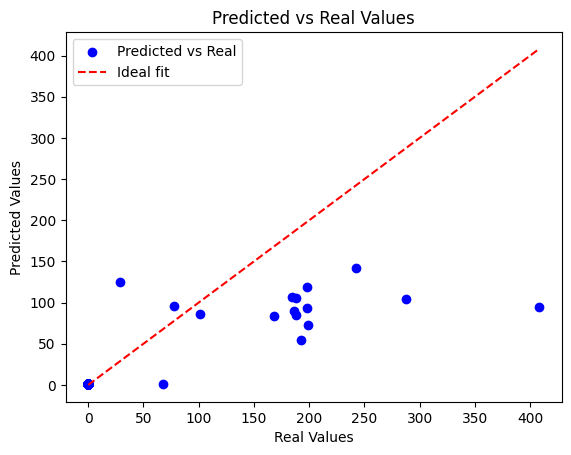

In [17]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Real')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal fit')
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs Real Values')
plt.legend()
plt.show()


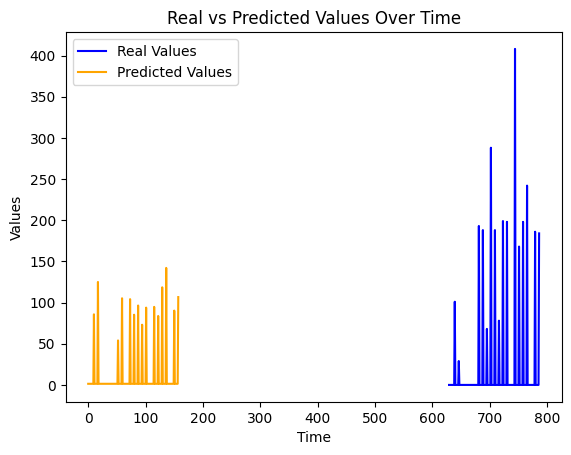

In [18]:
plt.plot(y_test, label='Real Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='orange')
plt.xlabel('Time')
plt.ylabel('Values')
plt.title('Real vs Predicted Values Over Time')
plt.legend()
plt.show()

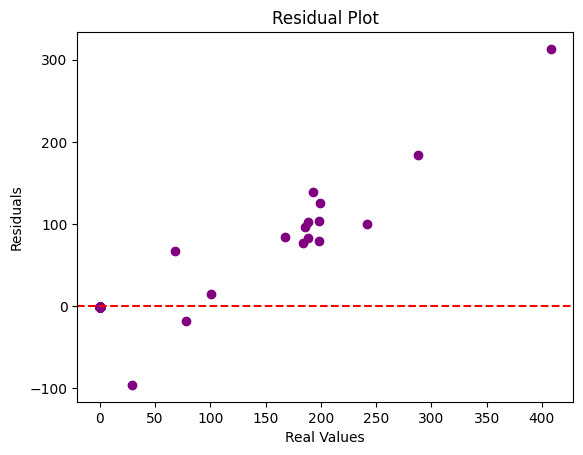

In [19]:
residuals = y_test - y_pred
plt.scatter(y_test, residuals, color='purple')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Real Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


# CNN MODEL

In [85]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore

In [86]:
def create_sequences(data, labels, window_size):
    sequences = []
    sequence_labels = []
    
    for i in range(len(data) - window_size):
        seq = data.iloc[i:i+window_size].values
        label = labels.iloc[i+window_size]
        sequences.append(seq)
        sequence_labels.append(label)
    
    return np.array(sequences), np.array(sequence_labels)

# Tamanho da janela (número de passos de tempo a considerar)
window_size = 5

# Reformular X_train e y_train
X_train_seq, y_train_seq = create_sequences(X_train, y_train, window_size)
X_test_seq, y_test_seq = create_sequences(X_test, y_test, window_size)

print(f"Shape de X_train_seq: {X_train_seq.shape}")
print(f"Shape de X_test_seq: {X_test_seq.shape}")
print(f"Shape de y_train_seq: {y_train_seq.shape}")
print(f"Shape de y_test_seq: {y_test_seq.shape}")

model_cnn = Sequential()

# Camada convolucional 1D
model_cnn.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(X_train_seq.shape[1], X_train_seq.shape[2])))

# Camada de pooling 1D
model_cnn.add(MaxPooling1D(pool_size=2))

# Achatar a saída e adicionar camadas densas
model_cnn.add(Flatten())
model_cnn.add(Dense(50, activation='relu'))
model_cnn.add(Dropout(0.5))

# Camada de saída
model_cnn.add(Dense(1, activation='linear'))

# Compilar o modelo
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Treinar o modelo
model_cnn.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_data=(X_test_seq, y_test_seq), verbose=1)

# Fazer previsões no conjunto de teste
y_pred = model_cnn.predict(X_test_seq)

# Calcular e imprimir as métricas de avaliação
mae = mean_absolute_error(y_test_seq, y_pred)
mse = mean_squared_error(y_test_seq, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_seq, y_pred)
me = np.mean(y_test_seq - y_pred)
mav = np.mean(np.abs(y_test_seq))
mpv = np.mean(np.abs((y_test_seq - y_pred) / y_test_seq))
rme = np.mean((y_test_seq - y_pred) / y_test_seq)
rmae = np.mean(np.abs(y_test_seq - y_pred) / np.abs(y_test_seq))

Shape de X_train_seq: (724, 5, 13)
Shape de X_test_seq: (53, 5, 13)
Shape de y_train_seq: (724,)
Shape de y_test_seq: (53,)
Epoch 1/100


c:\Users\Patyc\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 923.3076 - val_loss: 6749.1792
Epoch 2/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1047.1049 - val_loss: 6656.1729
Epoch 3/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1042.1471 - val_loss: 6529.9141
Epoch 4/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1035.2085 - val_loss: 6443.3325
Epoch 5/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 959.1113 - val_loss: 6432.5571
Epoch 6/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 738.2848 - val_loss: 6423.9102
Epoch 7/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 992.7738 - val_loss: 6421.3984
Epoch 8/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1109.3816 - val_loss: 6431.9004
Epoch 9/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 905.2199 - val_loss: 6441.8071
Epoch 10/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 865.4438 - val_loss: 6406.1367
Epoch 11/100
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 909.1852 - val_loss: 6441.3833
Epoch 12/100
23

C:\Users\Patyc\AppData\Local\Temp\ipykernel_83748\1232026401.py:57: RuntimeWarning: divide by zero encountered in divide
  mpv = np.mean(np.abs((y_test_seq - y_pred) / y_test_seq))
C:\Users\Patyc\AppData\Local\Temp\ipykernel_83748\1232026401.py:58: RuntimeWarning: divide by zero encountered in divide
  rme = np.mean((y_test_seq - y_pred) / y_test_seq)
C:\Users\Patyc\AppData\Local\Temp\ipykernel_83748\1232026401.py:59: RuntimeWarning: divide by zero encountered in divide
  rmae = np.mean(np.abs(y_test_seq - y_pred) / np.abs(y_test_seq))


In [87]:
print("Modelo: CNN")
print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'RMSE: {rmse}')
print(f'R2: {r2}')
print(f'ME: {me}')
print(f'MAV: {mav}')
print(f'MPV: {mpv}')
print(f'RME: {rme}')
print(f'RMAE: {rmae}')

# SHUFFLE
# Modelo: CNN
# MAE: 26.636787395851286
# MSE: 4029.62239748553
# RMSE: 63.47930684471539
# R2: -0.03311800956726074
# ME: 9.677049780203626
# MAV: 19.058823529411764
# MPV: inf
# RME: -inf
# RMAE: inf

# SPLIT
# MAE: 32.60401576420046
# MSE: 6396.575862420431
# RMSE: 79.97859627688167
# R2: -0.044217467308044434
# ME: 17.569933963271808
# MAV: 26.150943396226417
# MPV: inf
# RME: -inf
# RMAE: inf


Modelo: CNN
MAE: 32.60401576420046
MSE: 6396.575862420431
RMSE: 79.97859627688167
R2: -0.044217467308044434
ME: 17.569933963271808
MAV: 26.150943396226417
MPV: inf
RME: -inf
RMAE: inf
